### Importing Necessary Libraries

In [733]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading The Dataset

In [734]:
training_data = pd.read_csv("USA Housing Dataset.csv")
training_data = training_data.dropna() # Dropping any null values
training_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


Looking at the dataset, the columns `country` and `date` are irrelevant so we drop them. Furthermore we can see that the columns `statezip`, `city` and `street` point out the location of the house. Streets for each house will be different hence will have a large nuber of unique values so it becomes redundant. Thus I chose to drop `street`.

In [735]:
training_data = training_data.drop(['date', 'country', 'street'], axis=1)
training_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,Seattle,WA 98103
1,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,Carnation,WA 98014
2,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,Issaquah,WA 98029
3,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,Seattle,WA 98117
4,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,Seattle,WA 98146


In [736]:
training_data.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
city              object
statezip          object
dtype: object

The non numeric columns in our dataset now are `city` and `statezip`. We perform `one-hot encoding` on them using pandas.

In [737]:
training_data = pd.get_dummies(training_data, columns=['city', 'statezip'], drop_first=True)
training_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,...,False,False,False,False,False,False,False,False,False,False
1,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,...,False,False,False,False,False,False,False,False,False,False
2,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,...,False,False,False,False,False,False,False,False,False,False
3,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,...,False,False,False,False,False,False,False,False,False,False
4,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,...,False,False,False,False,False,False,False,False,False,False


### Scaling The Input Features and the Target

In [738]:
# Performing Z-Score Normalization
X = training_data.drop(["price"],axis=1)
X = (X - X.mean()) / X.std()
y = training_data["price"]
y = (y - y.mean()) / y.std()
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,-0.443042,-0.207769,-0.839326,-0.371093,2.777633,-0.086848,-0.311931,-0.666755,-0.570422,-0.672527,...,-0.141247,-0.111667,-0.125291,-0.109429,-0.104816,-0.074734,-0.111667,-0.122274,-0.021982,-0.021982
1,0.663227,1.385129,1.458369,4.034145,0.908268,-0.086848,-0.311931,-0.666755,1.983611,-0.672527,...,-0.141247,-0.111667,-0.125291,-0.109429,-0.104816,-0.074734,-0.111667,-0.122274,-0.021982,-0.021982
2,1.769497,5.526665,5.354005,3.214312,0.908268,-0.086848,-0.311931,-0.666755,5.327072,1.157992,...,-0.141247,-0.111667,-0.125291,-0.109429,-0.104816,-0.074734,-0.111667,-0.122274,-0.021982,-0.021982
3,-0.443042,0.110810,-1.196513,-0.384472,0.908268,-0.086848,-0.311931,-0.666755,-1.199642,-0.241817,...,-0.141247,-0.111667,-0.125291,-0.109429,-0.104816,-0.074734,-0.111667,-0.122274,-0.021982,-0.021982
4,1.769497,0.747970,0.957053,-0.214139,-0.961098,-0.086848,-0.311931,2.280779,-0.268581,2.471658,...,-0.141247,-0.111667,-0.125291,-0.109429,-0.104816,-0.074734,-0.111667,-0.122274,-0.021982,-0.021982


### Identifying Outliers

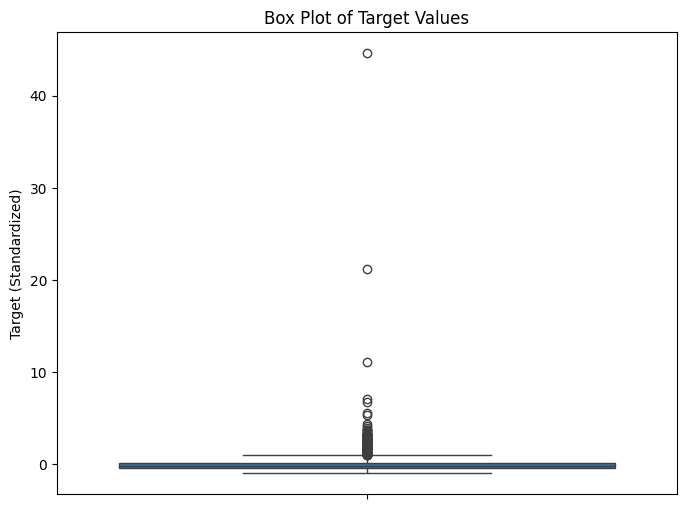

In [739]:
# Plotting box plot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=y) 
plt.title('Box Plot of Target Values')
plt.ylabel('Target (Standardized)')
plt.show()

Here we can see that the dataset does have outliers. I chose to drop all data points above `10`.

In [740]:
# Filtering the dataset
filtered_indices = y <= 10
X = X[filtered_indices]
y = y[filtered_indices]

# Display the new shapes
print("Shape of X after filtering:", X.shape)
print("Shape of y after filtering:", y.shape)
y = y.values.reshape(-1,1)

Shape of X after filtering: (4137, 130)
Shape of y after filtering: (4137,)


### Implementing The Model

In [741]:
def h(X, theta):
    return np.dot(X, theta)

In [742]:
def compute_cost(X, y, theta):
    m = len(y)  # Number of training examples
    predictions = h(X, theta)  # Use h(x, theta) for predictions
    errors = predictions - y  # Errors: h(X) - y
    cost = (1 / (2 * m)) * np.sum(errors**2)  # Mean Squared Error
    return cost

In [743]:
def compute_gradient(X, y, theta):
    m = len(y)  # Number of training examples
    predictions = h(X, theta)  # Use h(x, theta) for predictions
    errors = predictions - y  # Errors: h(X) - y
    gradient = (1 / m) * np.dot(X.T, errors)  # Gradient: (1 / m) * X^T * errors
    return gradient

In [744]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    cost_history = []
    for _ in range(iterations):
        gradient = compute_gradient(X, y, theta)  # Compute gradient
        theta -= learning_rate * gradient  # Update theta
        cost = compute_cost(X, y, theta)  # Compute cost
        cost_history.append(cost)  # Save cost for analysis
    return theta, cost_history

In [745]:
def model(X, y, learning_rate=0.01, iterations=1000):
    # Initialize parameters
    theta = np.zeros((X.shape[1], 1))
    
    # Perform gradient descent
    theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)
    return theta, cost_history

In [746]:
learning_rate = 0.01
iterations = 1000
theta, cost_history = model(X, y, learning_rate, iterations)

print("Learned Parameters (theta):")
print(theta)
print("\nFinal Cost:", cost_history[-1])

Learned Parameters (theta):
[[-3.78720250e-02]
 [ 2.75188323e-02]
 [ 1.75664853e-01]
 [ 4.19840185e-03]
 [-1.84856118e-02]
 [ 4.37003583e-02]
 [ 7.62602891e-02]
 [ 3.14844700e-02]
 [ 1.74671031e-01]
 [ 3.81980191e-02]
 [-7.67618450e-03]
 [ 1.16327918e-02]
 [-5.55882896e-02]
 [-2.36449858e-03]
 [ 4.44406273e-02]
 [-4.56282727e-03]
 [-4.50065639e-03]
 [-1.16253935e-02]
 [-2.94586348e-03]
 [ 3.44247319e-03]
 [-8.43190187e-03]
 [-1.02526284e-02]
 [-9.31969380e-03]
 [-1.55087866e-02]
 [ 7.90713051e-04]
 [-4.12888059e-02]
 [-4.91437317e-03]
 [-5.24007851e-03]
 [-3.38584170e-02]
 [ 1.70812353e-02]
 [-1.03234102e-02]
 [-2.06890606e-02]
 [ 4.81848479e-02]
 [ 3.63371967e-02]
 [-1.26955833e-03]
 [ 1.12671887e-02]
 [ 1.00872874e-04]
 [-9.09065759e-03]
 [-5.04615466e-03]
 [-1.11408913e-03]
 [-3.04132335e-03]
 [ 1.50336868e-02]
 [-3.37392501e-02]
 [ 8.25988868e-03]
 [-1.39401155e-03]
 [ 4.58090885e-02]
 [-1.41262569e-03]
 [-2.15877666e-03]
 [-1.22100460e-02]
 [ 5.01781904e-04]
 [ 5.36079827e-03]
 [-

### Plotting Cost Over Iterations

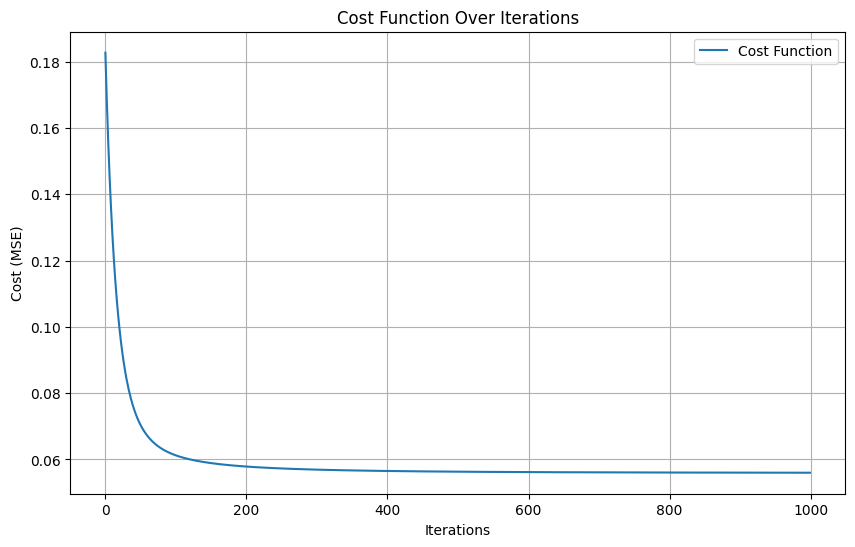

In [747]:
# Plot the cost function
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history)), cost_history, label='Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Over Iterations')
plt.legend()
plt.grid(True)
plt.show()

### Visualizing Actual vs Predicted Prices

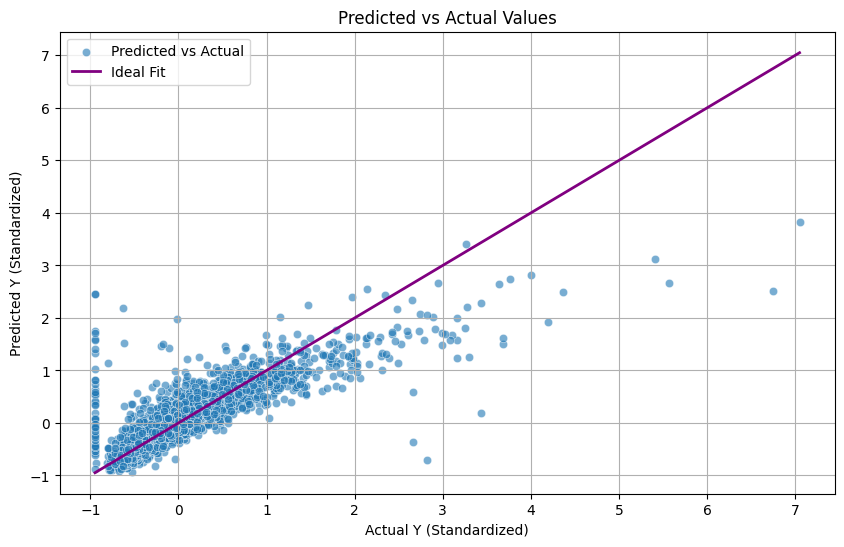

In [748]:
y_pred = h(X, theta)

plot_data = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data, x='Actual', y='Predicted', alpha=0.6, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], 
         [y.min(), y.max()], 
         color='purple', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Y (Standardized)')
plt.ylabel('Predicted Y (Standardized)')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()

### Comparing The Model With sklearn

In [749]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
sklearn_model = LinearRegression()
sklearn_model.fit(X, y)

# Make predictions using the sklearn model
y_pred_sklearn = sklearn_model.predict(X)

In [750]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_custom = mean_absolute_error(y, y_pred)
mse_custom = mean_squared_error(y, y_pred)
rmse_custom = np.sqrt(mse_custom)
r2_custom = r2_score(y, y_pred)
# Sklearn metrics
mae_sklearn = mean_absolute_error(y, y_pred_sklearn)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
r2_sklearn = r2_score(y, y_pred_sklearn)

# Print comparison
print("Custom Model Metrics:")
print(f"MAE: {mae_custom:.4f}, MSE: {mse_custom:.4f}, RMSE: {rmse_custom:.4f}, R²: {r2_custom:.4f}")

print("\nSklearn Model Metrics:")
print(f"MAE: {mae_sklearn:.4f}, MSE: {mse_sklearn:.4f}, RMSE: {rmse_sklearn:.4f}, R²: {r2_sklearn:.4f}")

Custom Model Metrics:
MAE: 0.1796, MSE: 0.1120, RMSE: 0.3347, R²: 0.7059

Sklearn Model Metrics:
MAE: 0.1803, MSE: 0.1118, RMSE: 0.3344, R²: 0.7065


Here we can see that the R^2 value of our model is 0.7059 whereas sklearn's implementation has a R^2 value of 0.7065. Suggesting that our model performs pretty well.